## Computer Vision tutorial

Learning how to load, scale, manipulate images for deep learning

In [1]:
import numpy as np
from numpy import asarray
import PIL
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image

%matplotlib inline

## 1. Load images with PIL/Pillow

In [2]:
print("Pillow Version: ", PIL.__version__)
print("PIL Version: ", PIL.VERSION)

Pillow Version:  5.4.1
PIL Version:  1.1.7


JPEG
RGB
(640, 360)


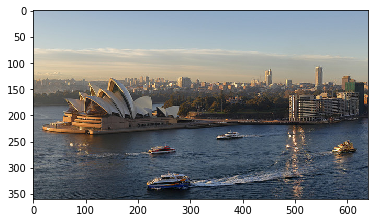

In [3]:
image = Image.open("Sydney-Opera-House.jpg")
print(image.format)
print(image.mode)
print(image.size)
# opens up external viewer
# image.show()
plt.imshow(image)
plt.show()

### Load and display images with matplotlib

uint8
(360, 640, 3)


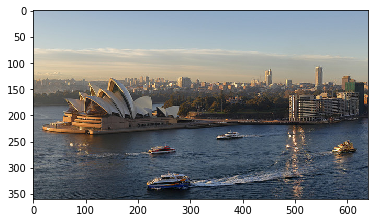

In [3]:
# load image as pixel array
data = image.imread("Sydney-Opera-House.jpg")

print(data.dtype)
print(data.shape)

plt.imshow(data)
plt.show()

### Load image and convert to/from numpy array

(360, 640, 3)
None
RGB
(640, 360)


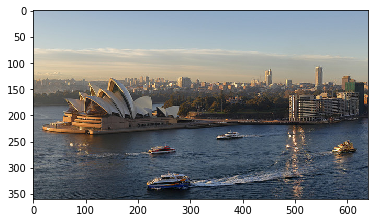

In [5]:
image = Image.open("Sydney-Opera-House.jpg")
data = asarray(image)
print(data.shape)

image2 = Image.fromarray(data)
print(image2.format)
print(image2.mode)
print(image2.size)
plt.imshow(image2)
plt.show()

### Saving image

In [9]:
image = Image.open("Sydney-Opera-House.jpg")

image.save("opera_house.png", format="PNG")

image2 = Image.open("opera_house.png")
print(image2.format)

PNG


### Saving image to grayscale

L


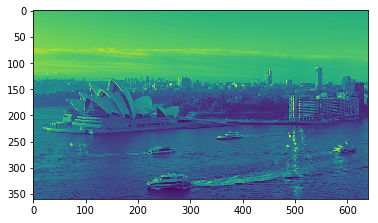

In [11]:
image = Image.open("Sydney-Opera-House.jpg")

gs_image = image.convert(mode="L")

gs_image.save("opera_house_grayscale.jpg")

image2 = Image.open("opera_house_grayscale.jpg")
print(image2.mode)
image2.show()

## 2. Image Manipulations

### Resize image

(640, 360)
(100, 56)


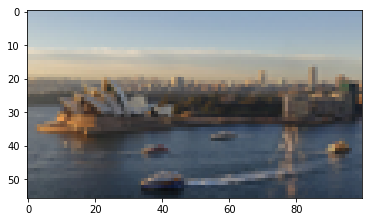

In [12]:
image = Image.open("Sydney-Opera-House.jpg")
print(image.size)
image.thumbnail((100, 100))
print(image.size)
plt.imshow(image)
plt.show()

### Force image resize without maintaining aspect ratio

(640, 360)
(200, 200)


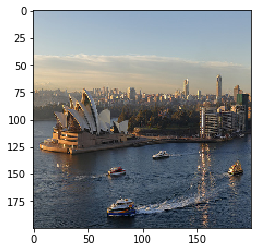

In [13]:
image = Image.open("Sydney-Opera-House.jpg")
print(image.size)
img_resized = image.resize((200, 200))
print(img_resized.size)
plt.imshow(img_resized)

### Flip image

(640, 360)


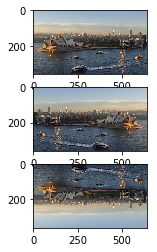

In [14]:
image = Image.open("Sydney-Opera-House.jpg")
print(image.size)
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)

ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

plt.subplot(311)
plt.imshow(image)
plt.subplot(312)
plt.imshow(hoz_flip)
plt.subplot(313)
plt.imshow(ver_flip)
plt.show()

### Rotate image

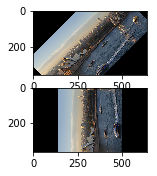

In [15]:
image = Image.open("Sydney-Opera-House.jpg")
plt.subplot(312)
plt.imshow(image.rotate(45))
plt.subplot(313)
plt.imshow(image.rotate(90))
plt.show()

### Crop image

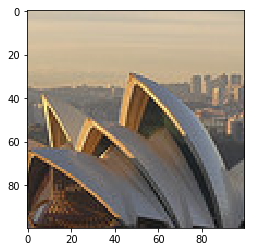

In [16]:
image = Image.open("Sydney-Opera-House.jpg")
cropped = image.crop((100, 100, 200, 200))
plt.imshow(cropped)
plt.show()

## Extensions

* __Your Own images__ Experiment with Pillow functions for reading and manipulating images with your own image data.

* __More Transforms__ Review the Pillow API documentation and experiment with additional image manipulation functions.

* __Image Pre-processing__ Write a function to create augmented versions of an image ready for use with a deep learning neural network.

## Image Pre-processing

Create a function to create augmented versions of an image

More image operations can be found at the following file:
https://github.com/python-pillow/Pillow/blob/master/src/PIL/ImageOps.py

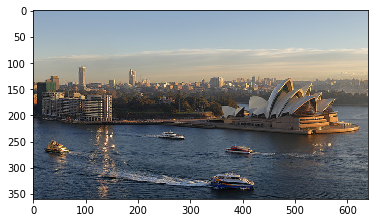

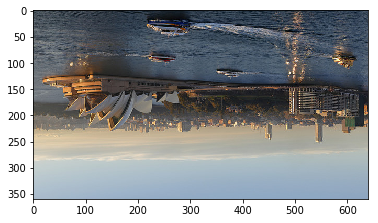

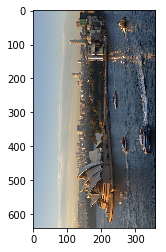

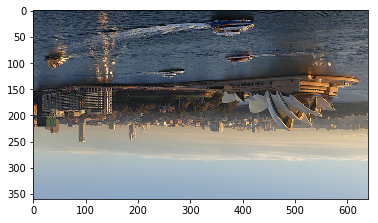

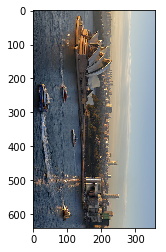

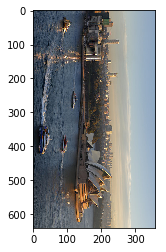

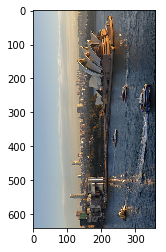

In [24]:
def augmented_images(image_path):
    """
    Takes an image path and performs transformations on it.
    
    Returns list of augmented images
    
    :param image_path: Path of image
    """

    transforms = [
        Image.FLIP_LEFT_RIGHT,
        Image.FLIP_TOP_BOTTOM,
        Image.ROTATE_90,
        Image.ROTATE_180,
        Image.ROTATE_270,
        Image.TRANSVERSE,
        Image.TRANSPOSE
    ]

    augmentations = list()
    
    with Image.open(image_path) as img:
        for transform in transforms:
            augmentations.append(img.transpose(transform))
    
    return augmentations

res = augmented_images("Sydney-Opera-House.jpg")        
for i in range(len(res)):
    plt.imshow(res[i])
    plt.show()